# Exponential Values 

In [1]:
import numpy as np 
from scipy.stats import expon
import matplotlib.pyplot as plt 

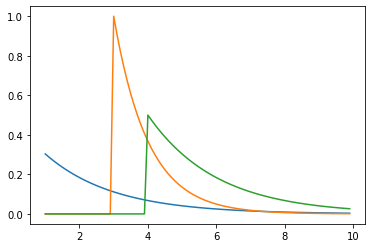

In [2]:
x = np.arange(1,10,0.1)
plt.plot(x,expon.pdf(x,0,2)) #(range, loc , scale )
plt.plot(x,expon.pdf(x,3,1))
plt.plot(x,expon.pdf(x,4,2))
plt.show()


# Binomial Probability mass function 
Many instances of binomial distributions can be found in real life. For example, if a new drug is introduced to cure a disease, it either cures the disease (it’s successful) or it doesn’t cure the disease (it’s a failure). If you purchase a lottery ticket, you’re either going to win money, or you aren’t. Basically, anything you can think of that can only be a success or a failure can be represented by a binomial distribution.

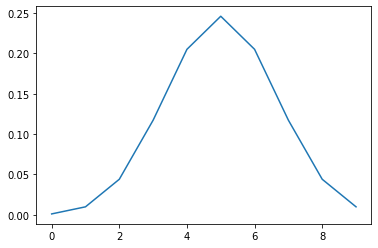

In [3]:
from scipy.stats import binom

x = np.arange (0,10)
plt.plot(x,binom.pmf(x,10,0.5)) #pmf(successful result , no of attempts , probability of getting the result)


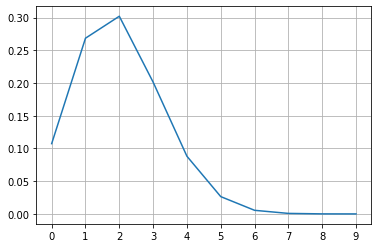

In [4]:
from scipy.stats import binom

x = np.arange (0,10)
axes = plt.axes()
axes.grid()
axes.set_xticks(np.arange(0,10))
plt.plot(x,binom.pmf(x,10,0.2)) #pmf(successful result , no of attempts , probability of getting the result)
plt.show()

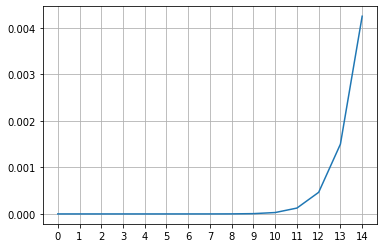

In [5]:
from scipy.stats import binom

x = np.arange (0,15)
axes = plt.axes()
axes.grid()
axes.set_xticks(np.arange(0,30))
plt.plot(x,binom.pmf(x,30,0.7)) #pmf(successful result , no of attempts , probability of getting the result)
plt.show()

In [6]:
binom.pmf(15,30,0.7) #probability of getting rain for 15 days in a month is 0.7

0.010566965115237258

# Poisson Probablility mass function 

In [7]:
from scipy.stats import poisson

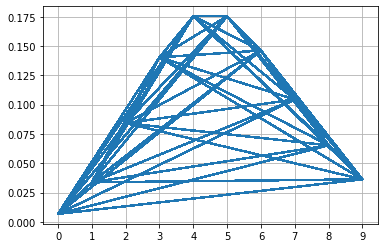

In [8]:
x = np.arange(0,10,0.01)
mv = 5    # defined mean value 
x1 = np.random.randint(0,10,10000) #setting up the random integer 
axes = plt.axes()
axes.grid()
axes.set_xticks(np.arange(0,10)) #plotting every coming point 
plt.plot(x1,poisson.pmf(x1,mv)) #using the poisson distribution for the random variable with mean value  
plt.show()

# Percentile and Deviation 

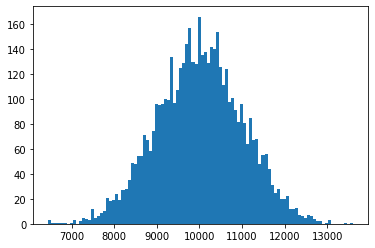

In [9]:
values = np.random.normal(10000,1000,5000) #.normal(around , sd , )
plt.hist(values,100) 
plt.show()

In [10]:
np.percentile(values,50)

10007.972248682861

In [11]:
np.percentile(values,90)

11310.405397271183

In [12]:
from scipy import stats 


In [13]:
stats.skew(values) #evaluating skewness 

-0.045691164133439516

In [14]:
stats.kurtosis(values) #evaluataing  kurtosis

-0.047317101996230626

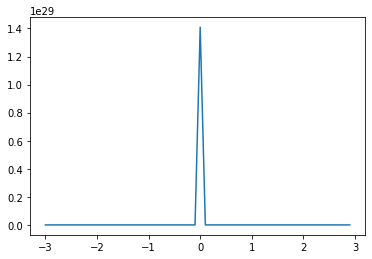

In [15]:
x = np.arange(-3,3,0.1)
y = 1/(x**2)
plt.plot(x,y)
plt.show()

In [16]:
stats.kurtosis(x)

-1.200666851903306

# Covariance and correlation
Covariance is a measure of how much two random variables vary together.
The formula is:
Cov(X,Y) = Σ E((X-μ)E(Y-ν)) / n-1 where:
X is a random variable
E(X) = μ is the expected value (the mean) of the random variable X and
E(Y) = ν is the expected value (the mean) of the random variable Y
n = the number of items in the data set

Correlation is about the relationship between variables. Correlations tell us:
1. whether this relationship is positive or negative
2. the strength of the relationship.





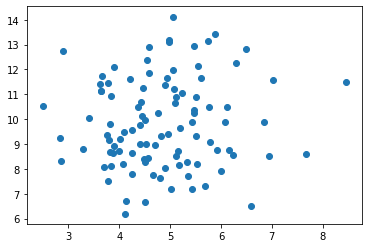

In [17]:
x = np.random.normal(5,1,100)
y = np.random.normal(10,2,100)
plt.scatter(x,y)
plt.plot()
plt.show()

In [18]:
def covariance(x,y):
    product = 0
    for a,b in zip(x,y): #zip function = store the data in tuple 
        product += ((a-x.mean())*(b-y.mean()))
    return product/len(x)

In [19]:
covariance(x,y)

0.14025466169869316

In [20]:
np.cov(x,y)

array([[1.09777098, 0.14167138],
       [0.14167138, 3.20622857]])

In [21]:
def correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))
correlation(x,y)

0.0755142646914703

In [22]:
np.corrcoef(x,y)

array([[1.        , 0.07551426],
       [0.07551426, 1.        ]])

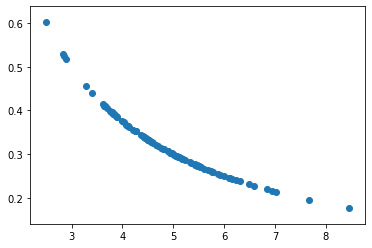

In [23]:
y1 = 1.5/x
plt.scatter(x,y1)
plt.show()

In [24]:
correlation(x,y1)

-0.9471287168940226

# Movie recommendation system 

In [25]:
import pandas as pd 

In [26]:
r_cols = ['user_id','movie_id','rating']
ratings = pd.read_csv('C:/Users/Ujjwal/Documents/Data_science/movierecommender/u.data',sep='\t',names=r_cols,usecols=range(3),encoding='ISO-8853-1') #importing the data from movierecommender and checking ratings 

In [27]:
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [28]:
m_cols = ['movie_id','title']
movies = pd.read_csv('C:/Users/Ujjwal/Documents/Data_science/movierecommender/u.item',sep='|',names=m_cols,usecols=range(2),encoding='ISO-8859-1') #importing the data from movierecommender and checking ratings 

In [29]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
ratings = pd.merge(movies,ratings)


In [31]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [32]:
movieratings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
starwarratings = movieratings['Star Wars (1977)']
starwarratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [34]:
similarMovies = movieratings.corrwith(starwarratings)
similarMovies.dropna()

C:\Users\Ujjwal\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ujjwal\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)                                       -0.645497
Absolute Power (1997)       

In [35]:
df = pd.DataFrame(similarMovies)
df.head()

,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [36]:
moviestats = ratings.groupby('title').agg({'rating':[np.size,np.mean]})
moviestats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [37]:
popularmovie = moviestats['rating']['size']>=100
moviestats[popularmovie].sort_values([('rating','mean')],ascending=False)

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      584  4.359589
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       368  4.206522
Boot, Das (1981)                                      201  4.203980
Sling Blade (1996)                                    136  4.198529
As Good As It Gets (1997)                             112  4.196429
Godfather: Part II, The (1974)                        209  4.186603
African Queen, The (1951)                             152  4.184211
...                                                   ...       ...
Ace Ventura: Pet Detective (1994)                     103  3.048544
Conan the Barbarian (1981)                            107  3.046729
Grumpier Old Men (1995)                               148  3.040541
Star Trek: The Motion Picture (1979)                  117  3.034188
Broken Arrow (1996)                                   254  3.031496
First Wives Club, The (1996)                          160  3.018750
Net, The (1995)                                       120  3.008333
Evita (1996)                                          259  2.980695
Natural Born Killers (1994)                           128  2.953125
Lost World: Jurassic Park, The (1997)                 158  2.943038
Dante's Peak (1997)                                   240  2.933333
Nutty Professor, The (1996)                           163  2.914110
101 Dalmatians (1996)                                 109  2.908257
Father of the Bride Part II (1995)                    128  2.898438
Mars Attacks! (1996)                                  217  2.847926
Multiplicity (1996)                                   134  2.835821
Alien 3 (1992)                                        100  2.830000
Volcano (1997)                                        219  2.808219
Waterworld (1995)                                     102  2.803922
Beavis and Butt-head Do America (1996)                156  2.788462
Mimic (1997)                                          101  2.742574
Down Periscope (1996)                                 101  2.702970
George of the Jungle (1997)                           162  2.685185
Batman Returns (1992)                                 142  2.683099
Batman Forever (1995)                                 114  2.666667
Spawn (1997)                           

In [38]:
popularmovie = moviestats[popularmovie].join(pd.DataFrame(similarMovies,columns = ["similarMovies"]))


C:\Users\Ujjwal\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [40]:
df.sort_values('similarity',ascending=False)

KeyError: 'similarity'

# USER BASED MOVIE RECOMMENDATION SYSTEM

In [50]:
import numpy as np 
import pandas as pd 


In [49]:
corrMatrix = movieratings.corr(method = 'pearson',min_periods = 100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
myratings = movieratings.loc[0].dropna()
myratings.head()

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [58]:
simcandidate = pd.Series()
for i in range(0,len(myratings.index)):
    print('Adding similarities for '+myratings.index[i]+'...')
    sims = corrMatrix[myratings.index[i]].dropna()
    sims =  sims.map(lambda x:x*myratings[i])
    simcandidate = simcandidate.append(sims)

simcandidate.sort_values(inplace = True, ascending = False)
simcandidate.head(10)

Adding similarities for Empire Strikes Back, The (1980)...
Adding similarities for Gone with the Wind (1939)...
Adding similarities for Star Wars (1977)...


Empire Strikes Back, The (1980)                       5.000000
Star Wars (1977)                                      5.000000
Empire Strikes Back, The (1980)                       3.741763
Star Wars (1977)                                      3.741763
Return of the Jedi (1983)                             3.606146
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.693297
Raiders of the Lost Ark (1981)                        2.680586
Austin Powers: International Man of Mystery (1997)    1.887164
Sting, The (1973)                                     1.837692
dtype: float64

In [62]:
simcandidate = simcandidate.groupby(simcandidate.index).sum()
simcandidate.sort_values(inplace = True, ascending = False)
simcandidate.head(10)

Empire Strikes Back, The (1980)              8.877450
Star Wars (1977)                             8.870971
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
dtype: float64

In [66]:
filteredsim  = simcandidate.drop(myratings.index)
filteredsim.head(10)

Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
Wizard of Oz, The (1939)                     3.200268
Dumbo (1941)                                 2.981645
dtype: float64

In [68]:
a = corrMatrix[myratings.index[2]].dropna()
a.sort_values(ascending = False)

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
Dumbo (1941)                                          0.317656
Bridge on the River Kwai, The (1957)                  0.316580
E.T. the Extra-Terrestrial (1982)                     0.303619
Mystery Science Theater 3000: The Movie (1996)        0.301809
Cinderella (1950)                                     0.299163
Batman (1989)                                         0.289344
Swingers (1996)                                  